## To predict credit card defaulters using Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [174]:
cc=pd.read_csv('C:\\Python_Training\\Python_Labs\\SLC\\Take Home\\Day 1\\creditcard.csv.crdownload')
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [175]:
cc.shape

(48884, 31)

In [176]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48884 entries, 0 to 48883
Data columns (total 31 columns):
Time      48884 non-null int64
V1        48884 non-null float64
V2        48884 non-null float64
V3        48884 non-null float64
V4        48884 non-null float64
V5        48884 non-null float64
V6        48884 non-null float64
V7        48884 non-null float64
V8        48884 non-null float64
V9        48884 non-null float64
V10       48884 non-null float64
V11       48884 non-null float64
V12       48884 non-null float64
V13       48884 non-null float64
V14       48884 non-null float64
V15       48884 non-null float64
V16       48884 non-null float64
V17       48884 non-null float64
V18       48884 non-null float64
V19       48884 non-null float64
V20       48883 non-null float64
V21       48883 non-null float64
V22       48883 non-null float64
V23       48883 non-null float64
V24       48883 non-null float64
V25       48883 non-null float64
V26       48883 non-null float64
V2

In [177]:
#Conclusion: All columns are of the type float or int

In [178]:
cc.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [179]:
# Conclusion there are null values in the dataset in certain columns, we need to clean them.

In [180]:
cols=['V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']
for i in cols:
    cc[i].replace(to_replace=np.NaN,value=np.mean(cc[i]),inplace=True)

In [181]:
cc['Class'].fillna(method='ffill',inplace=True)

In [182]:
cc.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [183]:
#Conclusion: null value has been filled

In [184]:
# Check the class balance
cc['Class'].value_counts()

0.0    48736
1.0      148
Name: Class, dtype: int64

In [185]:
# We can see that there is huge imbalance in the data

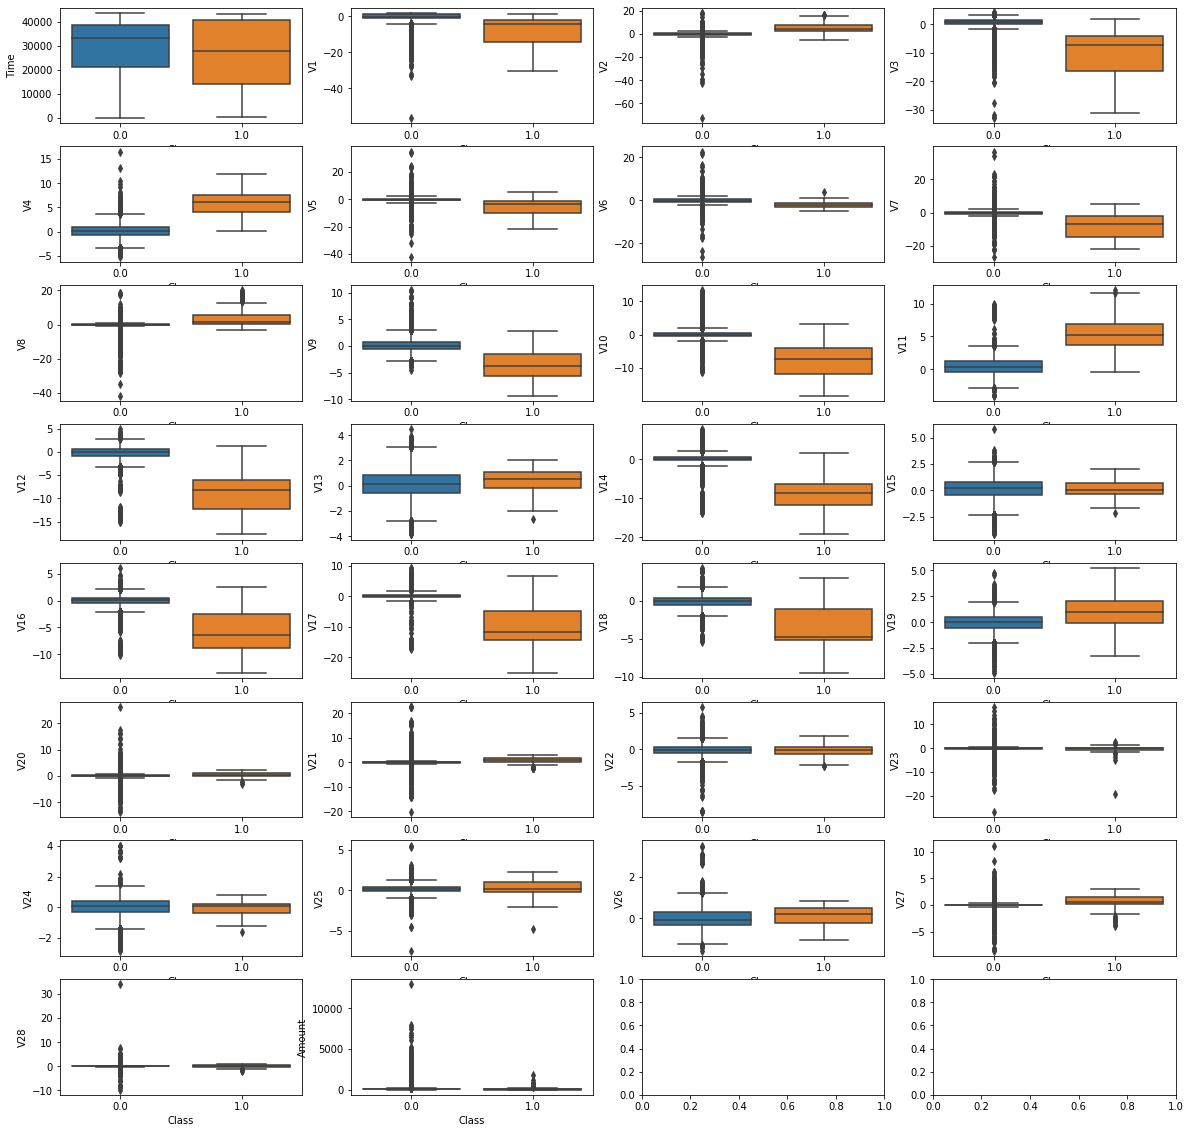

In [186]:
fig,axes=plt.subplots(8,4,figsize=(20,20))
axes=axes.flatten()

for i in range(0,len(cc.columns)-1):
    sns.boxplot(x='Class',y=cc.iloc[:,i],data=cc,ax=axes[i],orient='v')
plt.show()

In [187]:
# To check the multicollinearity using correlation matrix

In [188]:
cor=cc.corr()
cor

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.005256,-0.107173,-0.060327,-0.032784,-0.074953,-0.005676,-0.009289,0.043181,-0.338311,...,0.021056,0.047399,-0.002691,-0.009186,0.038367,-0.025402,-0.020284,0.001126,0.076339,-0.007176
V1,-0.005256,1.000000,-0.053870,0.301455,-0.097716,0.090890,0.107660,0.165127,-0.102074,-0.030235,...,-0.057876,-0.022896,-0.078752,-0.009670,0.167006,0.026508,-0.059404,0.075730,-0.233205,-0.217339
V2,-0.107173,-0.053870,1.000000,-0.201046,0.098610,-0.114659,-0.008319,-0.067764,0.082399,-0.016411,...,0.006534,-0.067406,-0.022271,-0.018347,-0.093563,-0.039913,0.069591,-0.077307,-0.530733,0.183987
V3,-0.060327,0.301455,-0.201046,1.000000,-0.143910,0.302117,-0.005989,0.336270,-0.279107,0.166639,...,-0.006763,0.238511,0.054542,0.022427,-0.183639,0.051642,-0.122705,0.035691,-0.187342,-0.403928
V4,-0.032784,-0.097716,0.098610,-0.143910,1.000000,-0.057146,-0.053752,-0.096814,0.091959,-0.008258,...,0.015730,0.008289,-0.006060,-0.008596,-0.008844,0.012213,0.052090,0.006003,0.093471,0.226206
V5,-0.074953,0.090890,-0.114659,0.302117,-0.057146,1.000000,0.077465,0.061929,-0.117028,0.065726,...,-0.071635,-0.064878,0.031561,-0.014371,-0.032161,-0.041441,-0.087533,0.053370,-0.382149,-0.211901
V6,-0.005676,0.107660,-0.008319,-0.005989,-0.053752,0.077465,1.000000,0.105748,-0.055929,0.047334,...,0.036080,0.021314,-0.019994,0.011156,0.051034,0.011178,-0.009627,-0.049686,0.211311,-0.100316
V7,-0.009289,0.165127,-0.067764,0.336270,-0.096814,0.061929,0.105748,1.000000,-0.158555,0.077174,...,-0.054015,-0.008638,0.083688,-0.005473,-0.112461,-0.039989,-0.121000,-0.068333,0.357116,-0.342095
V8,0.043181,-0.102074,0.082399,-0.279107,0.091959,-0.117028,-0.055929,-0.158555,1.000000,-0.076641,...,-0.057998,0.038834,-0.028844,0.004803,0.029043,0.002727,0.045368,0.041811,-0.088673,0.166518
V9,-0.338311,-0.030235,-0.016411,0.166639,-0.008258,0.065726,0.047334,0.077174,-0.076641,1.000000,...,-0.029572,0.015827,-0.034280,0.006685,0.105165,0.091509,-0.039469,-0.022972,-0.021076,-0.168704


In [189]:
# Defining label and features
X=cc.drop('Class',axis=1)
y=cc['Class']

In [190]:
#Splotting  data in train and test datasets.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [191]:
#The predictors need to be scaled as there is a lot of devation between the scales of values of various predictors.

In [192]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_trains=pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_tests=pd.DataFrame(ss.transform(X_test),columns=X_test.columns)

# Logistic Regression-Statistical approach

In [193]:
import statsmodels.api as sm

In [194]:
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

In [195]:
X_train_scaled=sm.add_constant(X_train_scaled)
stats_model=sm.Logit(y_train,X_train_scaled)
result=stats_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.004498
         Iterations 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                34218
Model:                          Logit   Df Residuals:                    34187
Method:                           MLE   Df Model:                           30
Date:                Sun, 12 Jul 2020   Pseudo R-squ.:                  0.7709
Time:                        14:53:15   Log-Likelihood:                -153.90
converged:                       True   LL-Null:                       -671.70
Covariance Type:            nonrobust   LLR p-value:                1.557e-198
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.2485      3.517     -2.914      0.004     -17.141      -3.356
x1            -0.3474      0.229     -1.519      0.129      -0.795       0.101
x2             0.0905      0.766      0.118      0.906      -1.410       1.591
x3             0.8541      2.810      0.304      0.761      -4.653       6.362
x4             0.7664      0.505      1.518      0.129      -0.223       1.756
x5             2.1510      3.274      0.657      0.511      -4.267       8.569
x6            -0.2433      2.446     -0.099      0.921      -5.037       4.551
x7            -1.0017      0.832     -1.205      0.228      -2.632       0.628
x8             0.3167      1.818      0.174      0.862      -3.247       3.880
x9             0.2327      0.336      0.694      0.488      -0.425       0.890
x10            0.3147      4.391      0.072      0.943      -8.292       8.922
x11           -0.9276      3.193     -0.290      0.771      -7.186       5.331
x12            0.1840      0.912      0.202      0.840      -1.604       1.972
x13            0.4872      1.386      0.351      0.725      -2.229       3.204
x14           -0.3359      1.169     -0.287      0.774      -2.627       1.955
x15           -0.8120      0.636     -1.276      0.202      -2.059       0.435
x16            0.5307      0.574      0.924      0.355      -0.595       1.656
x17            1.5389      4.948      0.311      0.756      -8.159      11.236
x18           -0.0132      1.001     -0.013      0.989      -1.975       1.949
x19           -1.2507      4.032     -0.310      0.756      -9.152       6.651
x20            0.4629      2.151      0.215      0.830      -3.754       4.679
x21           -0.2451      1.007     -0.243      0.808      -2.219       1.729
x22            0.6173      0.946      0.652      0.514      -1.238       2.472
x23            0.0242      1.291      0.019      0.985      -2.506       2.554
x24            0.0865      0.234      0.369      0.712      -0.373       0.546
x25           -0.4618      0.582     -0.793      0.428      -1.603       0.679
x26           -0.1006      0.254     -0.396      0.692      -0.598       0.397
x27            0.4229      0.213      1.990      0.047       0.006       0.839
x28           -0.5957      0.109     -5.451      0.000      -0.810      -0.382
x29           -0.2608      0.095     -2.750      0.006      -0.447      -0.075
x30            0.4062      0.593      0.685      0.494      -0.757       1.569
==============================================================================

Possibly complete quasi-separation: A fraction 0.49 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Logistic Regression-ML approach

In [196]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_trains,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [197]:
y_train_pred=LR.predict(X_trains)
y_train_prob=LR.predict_proba(X_trains)[:,1]

y_test_pred=LR.predict(X_tests)
y_test_prob=LR.predict_proba(X_tests)[:,1]

In [198]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

In [199]:
print('Classification report of training data','\n',classification_report(y_train,y_train_pred))
print('Confusion Matrix of training data','\n',confusion_matrix(y_train,y_train_pred))

print('\n')

print('Classification report of testing data','\n',classification_report(y_test,y_test_pred))
print('Confusion Matrix of testing data','\n',confusion_matrix(y_test,y_test_pred))

Classification report of training data 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34120
         1.0       0.78      0.67      0.72        98

   micro avg       1.00      1.00      1.00     34218
   macro avg       0.89      0.84      0.86     34218
weighted avg       1.00      1.00      1.00     34218

Confusion Matrix of training data 
 [[34101    19]
 [   32    66]]


Classification report of testing data 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14616
         1.0       0.82      0.64      0.72        50

   micro avg       1.00      1.00      1.00     14666
   macro avg       0.91      0.82      0.86     14666
weighted avg       1.00      1.00      1.00     14666

Confusion Matrix of testing data 
 [[14609     7]
 [   18    32]]


In [200]:
print('Accuracy on train', accuracy_score(y_train,y_train_pred))
print('AUC on train',roc_auc_score(y_train,y_train_prob))

print('\n')

print('Accuracy on test', accuracy_score(y_test,y_test_pred))
print('AUC on test',roc_auc_score(y_test,y_test_prob))

Accuracy on train 0.9985095563738383
AUC on train 0.9917404359164533


Accuracy on test 0.9982953770625937
AUC on test 0.9970812807881774


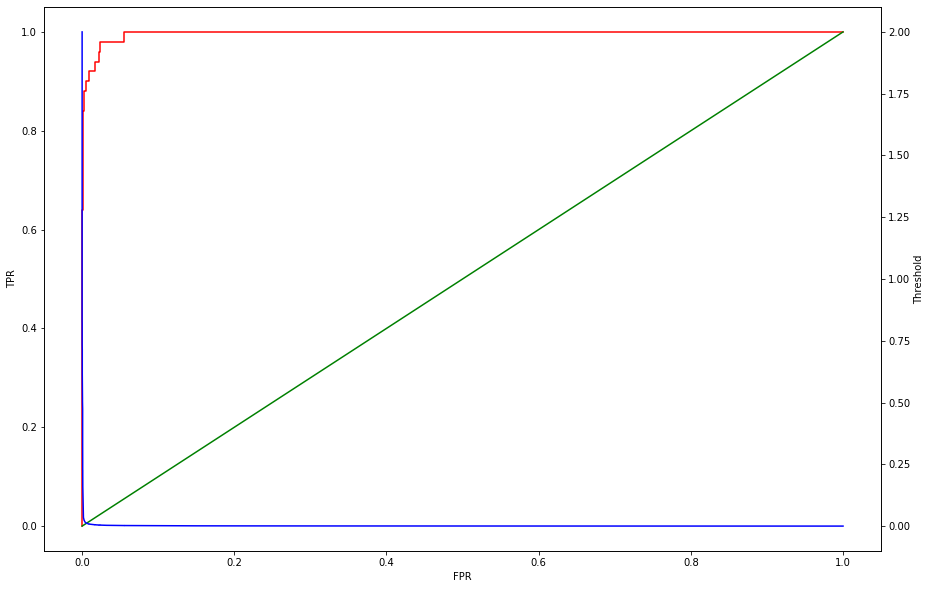

In [201]:
#ROC curve for testing data
fpr,tpr,threshold=roc_curve(y_test,y_test_prob)
fig,ax=plt.subplots(figsize=(15,10))
ax.plot(fpr,tpr,'r')
ax.plot(fpr,fpr,'g')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax1=ax.twinx()
ax1.plot(fpr,threshold,'b')
ax1.set_ylabel('Threshold')
plt.show()

In [202]:
roc=pd.DataFrame({'TPR':tpr,'FPR':fpr,'Thresholds':threshold})
roc

,TPR,FPR,Thresholds
0,0.00,0.000000,1.999995e+00
1,0.02,0.000000,9.999949e-01
2,0.42,0.000000,8.280739e-01
3,0.42,0.000068,8.228634e-01
4,0.54,0.000068,7.323322e-01
...,...,...,...
73,1.00,0.873700,6.021110e-05
74,1.00,0.873837,6.020040e-05
75,1.00,0.998016,1.197296e-07
76,1.00,0.998153,1.185527e-07
